In [1]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("jeleeladekunlefijabi/ship-performance-clustering-dataset")

print("Path to dataset files:", path)

/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/codespace/.cache/kagglehub/datasets/jeleeladekunlefijabi/ship-performance-clustering-dataset/versions/1


In [2]:
import pandas as pd
df = pd.read_csv(f"{path}/Ship_Performance_Dataset.csv")

In [3]:
df.sample(6)

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
1164,2023-11-19,Tanker,Coastal,Diesel,Fair,17.086050,958.588899,1093.195724,12.412694,Moderate,1257.251674,11170.786831,385904.371805,34.912703,0.933389,1.150678,3,90.303210
1678,2023-11-26,Container Ship,Long-haul,Steam Turbine,Fair,21.852114,759.487102,117.968792,11.340123,Rough,309.283423,65554.016489,227354.316084,39.789746,0.129547,1.197878,1,54.651417
75,2023-10-08,Container Ship,Long-haul,Steam Turbine,Fair,24.074836,2397.891603,941.271948,11.679049,Calm,1072.653418,173623.449374,774411.263131,50.161965,0.239671,1.324322,3,71.716908
2143,2024-01-28,Tanker,Long-haul,Diesel,Good,22.011744,1731.298985,1125.614169,14.026293,Calm,1167.826274,33850.894942,799141.826267,36.617414,1.046718,0.783303,5,69.976629
1807,2024-03-10,Bulk Carrier,Long-haul,Diesel,Fair,16.360172,1625.403828,765.637180,6.155706,Calm,1094.347232,54723.006641,361676.600765,60.961330,0.636847,1.378717,7,89.034494
2605,2024-03-10,Bulk Carrier,Coastal,Heavy Fuel Oil (HFO),Good,17.593956,2403.869937,1898.494148,6.488271,Rough,1953.097906,136321.079940,242313.802199,39.617650,1.123650,1.196475,1,77.813904


In [4]:
df.describe(include='object')

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition
count,2736,2600,2600,2600,2600,2600
unique,57,4,4,3,3,3
top,2023-06-04,Bulk Carrier,Long-haul,Diesel,Good,Calm
freq,48,669,686,892,873,893


In [5]:
print(f"{df.Weather_Condition.unique()=}")
print(f"{df.Maintenance_Status.unique()=}")
print(f"{df.Ship_Type.unique()=}")

df.Weather_Condition.unique()=array(['Moderate', 'Rough', 'Calm', nan], dtype=object)
df.Maintenance_Status.unique()=array(['Critical', 'Good', 'Fair', nan], dtype=object)
df.Ship_Type.unique()=array(['Container Ship', 'Fish Carrier', 'Bulk Carrier', nan, 'Tanker'],
      dtype=object)


In [6]:
df.describe(exclude="object")

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,17.602863,1757.610939,1036.406203,9.929103,1032.573264,255143.344488,521362.062011,41.747536,0.798656,1.003816,4.914839,75.219222
std,4.311979,717.002777,568.632080,2.876423,558.697499,140890.482189,271211.625499,17.633130,0.403590,0.288251,2.597647,14.510168
min,10.009756,501.025220,50.433150,5.001947,50.229624,10092.306318,50351.814447,12.019909,0.100211,0.500004,1.000000,50.012005
25%,13.928452,1148.104914,548.511573,7.437485,553.983629,131293.378767,290346.388017,26.173537,0.463592,0.758033,3.000000,62.703724
50%,17.713757,1757.494344,1037.816060,9.918965,1043.207497,257157.653226,520176.931762,41.585188,0.789877,1.009009,5.000000,75.504709
75%,21.284785,2382.594292,1540.934161,12.413149,1527.722391,381796.930499,750072.791216,57.363922,1.147426,1.252808,7.000000,87.721205
max,24.997043,2998.734329,1998.337057,14.992947,1999.126697,499734.867868,999916.696140,71.972415,1.499259,1.499224,9.000000,99.999643


In [7]:
print(df.select_dtypes(include='object').isnull().sum())

Date                    0
Ship_Type             136
Route_Type            136
Engine_Type           136
Maintenance_Status    136
Weather_Condition     136
dtype: int64


In [8]:
print(df.select_dtypes(exclude='object').isnull().sum())

Speed_Over_Ground_knots    0
Engine_Power_kW            0
Distance_Traveled_nm       0
Draft_meters               0
Cargo_Weight_tons          0
Operational_Cost_USD       0
Revenue_per_Voyage_USD     0
Turnaround_Time_hours      0
Efficiency_nm_per_kWh      0
Seasonal_Impact_Score      0
Weekly_Voyage_Count        0
Average_Load_Percentage    0
dtype: int64


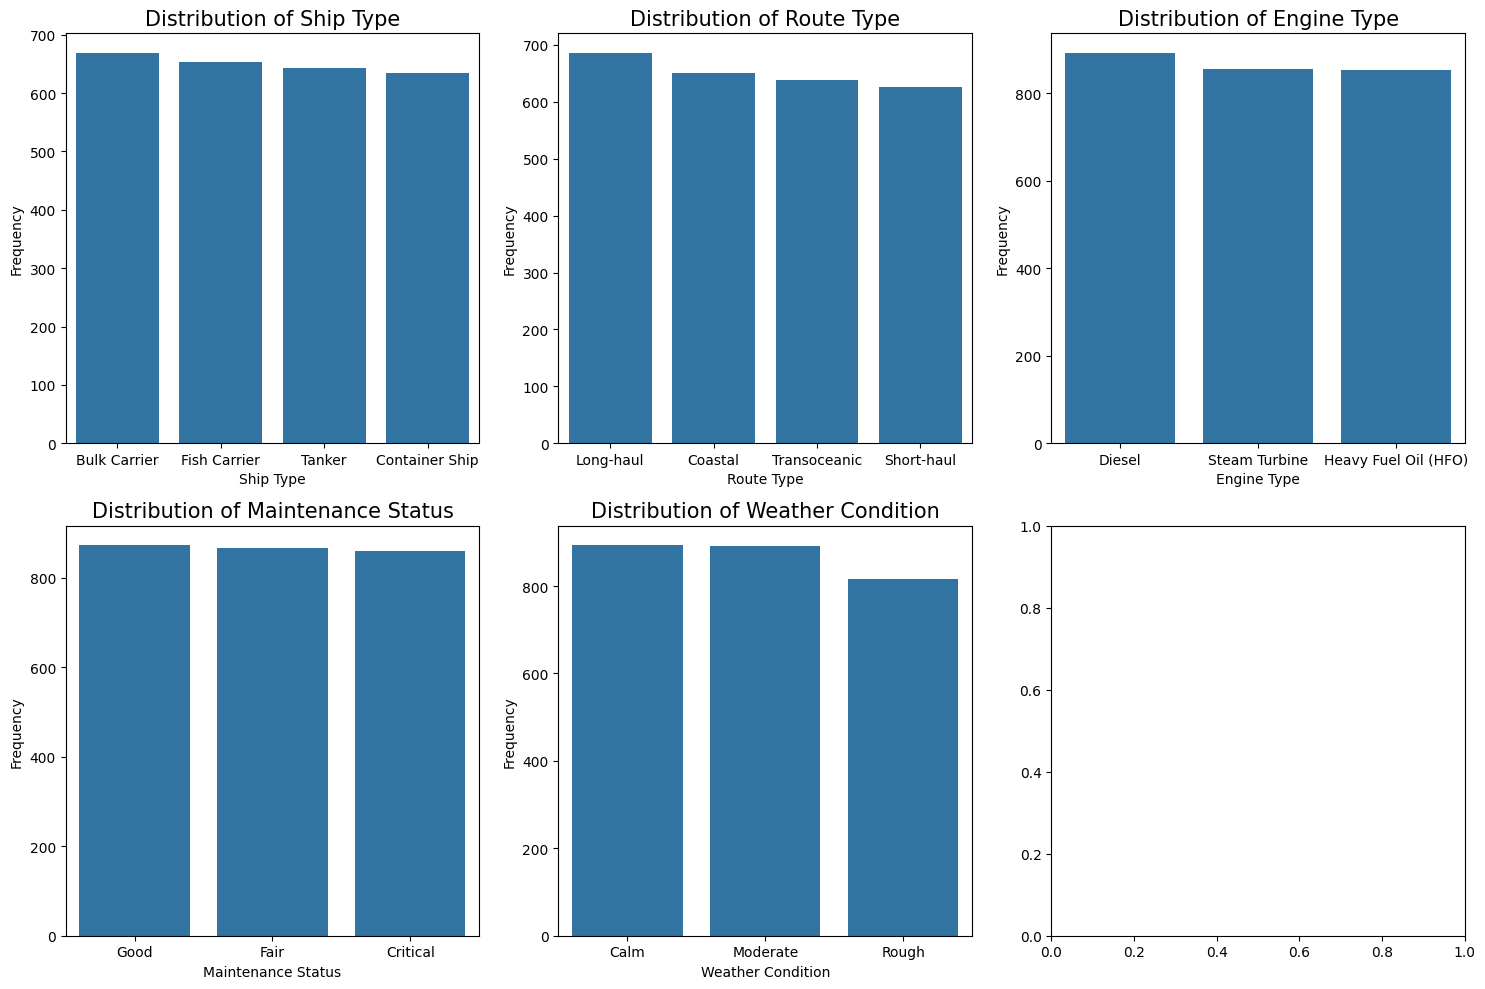

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a figure and a grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the array of axes for easy iteration
axes = axes.flatten()

# Loop through the object columns in the DataFrame
for i, col in enumerate(df.select_dtypes(include='object').columns.tolist()[1:]):
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values, ax=axes[i])
    axes[i].set_title(f'Distribution of {col.replace("_", " ").title()}', size=15)
    axes[i].set_xlabel(f'{col.replace("_", " ").title()}')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


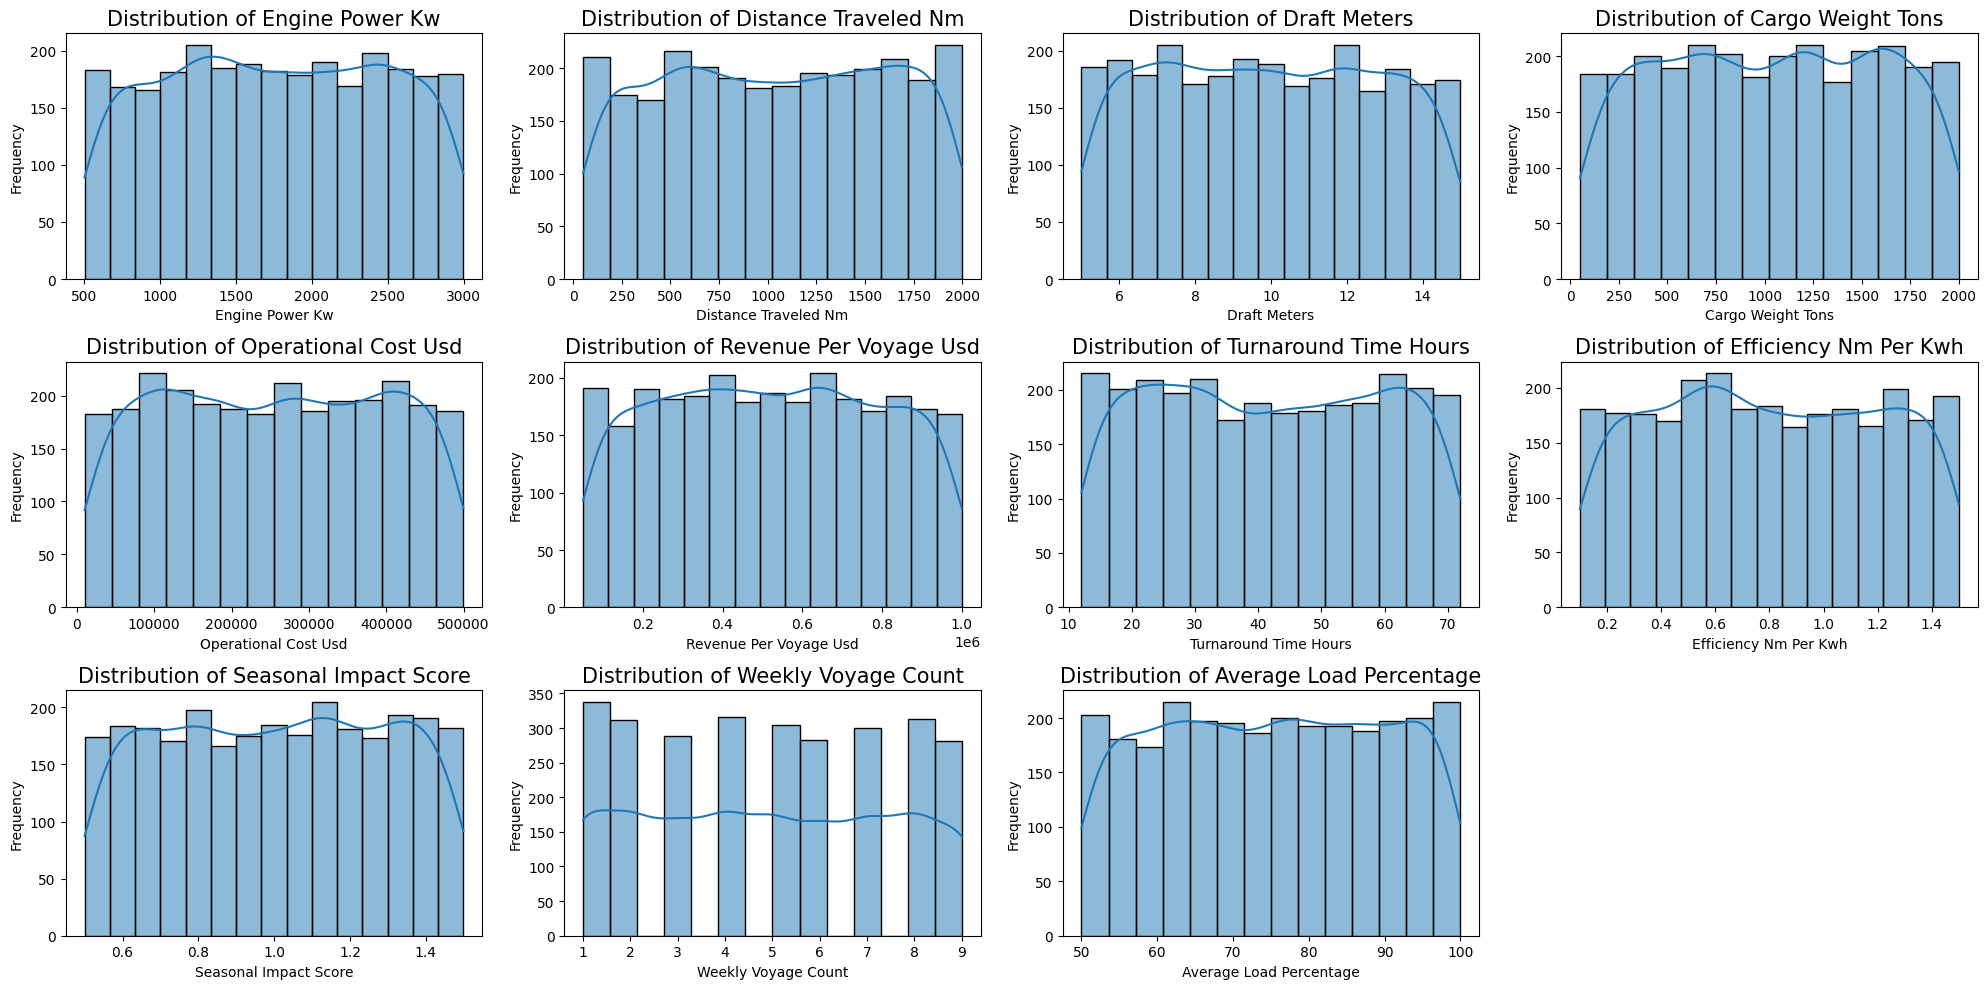

In [10]:
# Create a figure and a grid of subplots
plt.figure(figsize=(20, 10))

# Loop through the object columns in the DataFrame
for i, col in enumerate(df.select_dtypes(exclude='object').columns.tolist()[1:]):
    plt.subplot(3, 4, i+1)
    sns.histplot(data=df[col], kde=True)
    plt.title(f'Distribution of {col.replace("_", " ").title()}', size=15)
    plt.xlabel(f'{col.replace("_", " ").title()}')
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


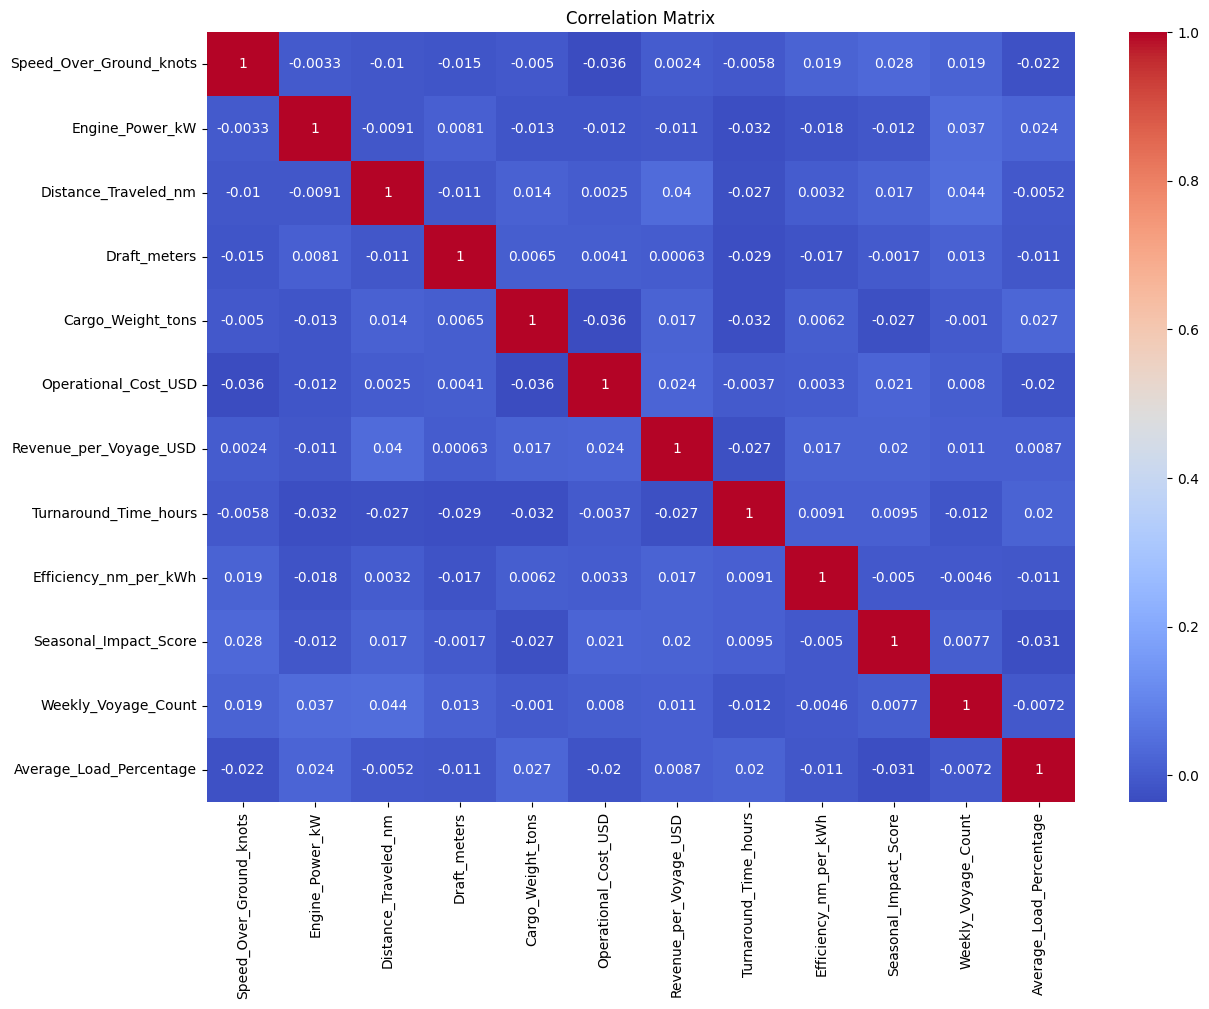

In [11]:
df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(14,10))

sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [12]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
data = df.copy()
# Fill NaN values with a constant value
# LabelEncoder for non-ordinal data
le = LabelEncoder()
data.drop(columns=['Date'], inplace=True)
data['Ship_Type'] = le.fit_transform(data['Ship_Type'])
data['Engine_Type'] = le.fit_transform(data['Engine_Type'])

# OrdinalEncoder for ordinal data with handle_unknown parameter
oe = OrdinalEncoder(
    categories=[
        ['Coastal', 'Short-haul', 'Long-haul', 'Transoceanic'],  # Route_Type
        ['Critical', 'Fair', 'Good'],                            # Maintenance_Status
        ['Rough','Moderate', 'Calm',]                            # Weather_Condition
    ],
    handle_unknown='use_encoded_value',
    unknown_value= -1  # Assign -1 to unknown categories
)

data[['Route_Type', 'Maintenance_Status', 'Weather_Condition']] = oe.fit_transform(data[['Route_Type', 'Maintenance_Status', 'Weather_Condition']])

data

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,1,-1.0,1,0.0,12.597558,2062.983982,1030.943616,14.132284,1.0,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2,1.0,2,2.0,10.387580,1796.057415,1060.486382,14.653083,0.0,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,1,2.0,0,1.0,20.749747,1648.556685,658.874144,7.199261,1.0,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,0,3.0,2,1.0,21.055102,915.261795,1126.822519,11.789063,1.0,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2,3.0,0,1.0,13.742777,1089.721803,1445.281159,9.727833,1.0,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,3,1.0,1,2.0,11.607997,2918.395972,239.990359,13.700906,1.0,318.111891,237975.067292,731584.322921,47.152337,1.000265,1.284895,3,74.813114
2732,0,1.0,1,2.0,13.852798,2161.282358,831.355653,14.612775,-1.0,218.309002,21029.021721,374365.370930,64.325916,0.653474,0.891085,2,84.595155
2733,1,1.0,2,0.0,16.813713,1343.608006,1376.460622,9.306518,-1.0,1630.646419,78883.312529,234120.365052,53.551090,0.594169,0.725404,6,80.975269
2734,3,3.0,1,2.0,23.132643,2028.143572,619.236340,6.623856,1.0,153.441965,25241.550250,799713.737211,14.335517,0.895670,0.902960,2,92.853622


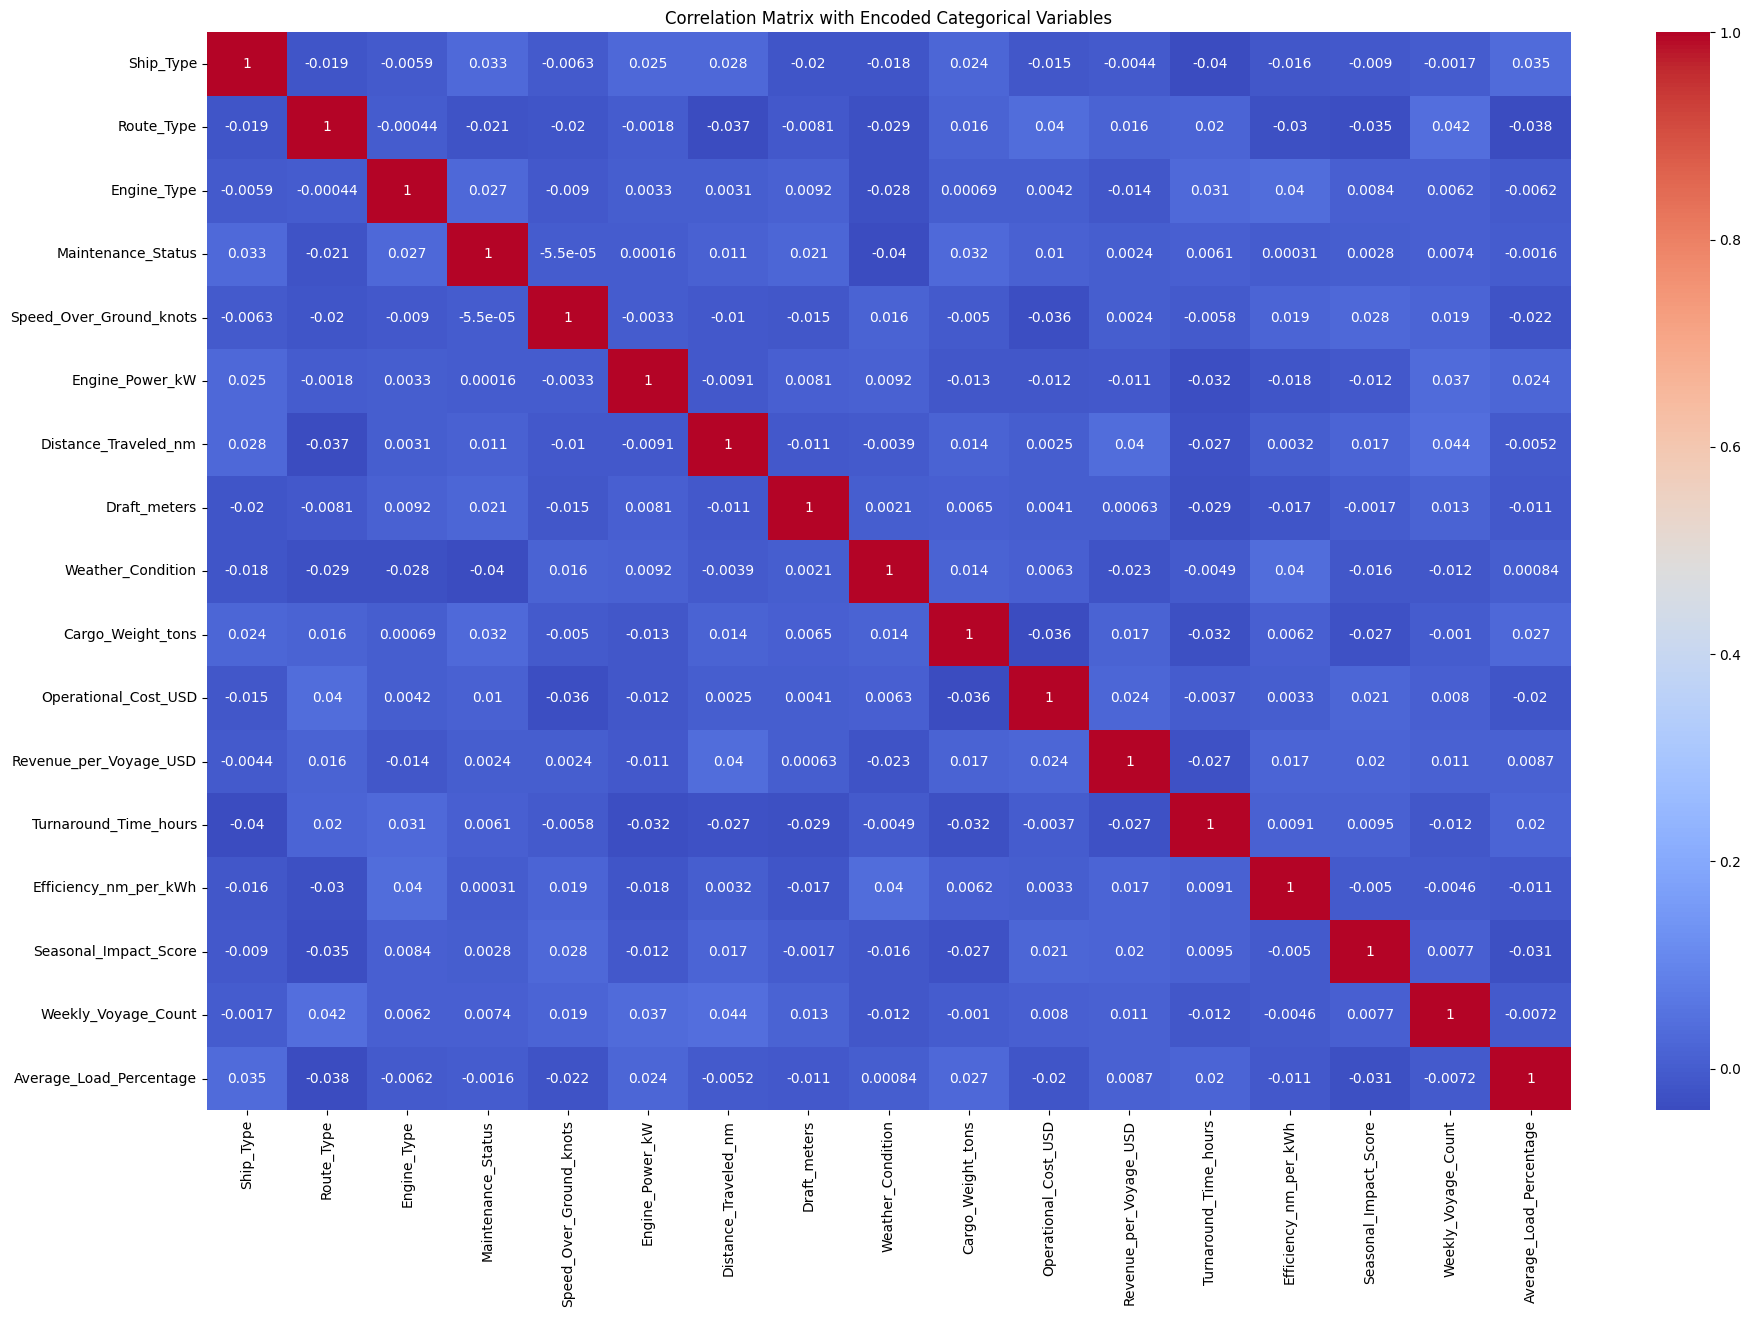

In [13]:
plt.figure(figsize=(22,14))

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix with Encoded Categorical Variables")
plt.show()


In [14]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

Text(0.5, 1.0, 'Correlation Matrix with Encoded Categorical Variables')

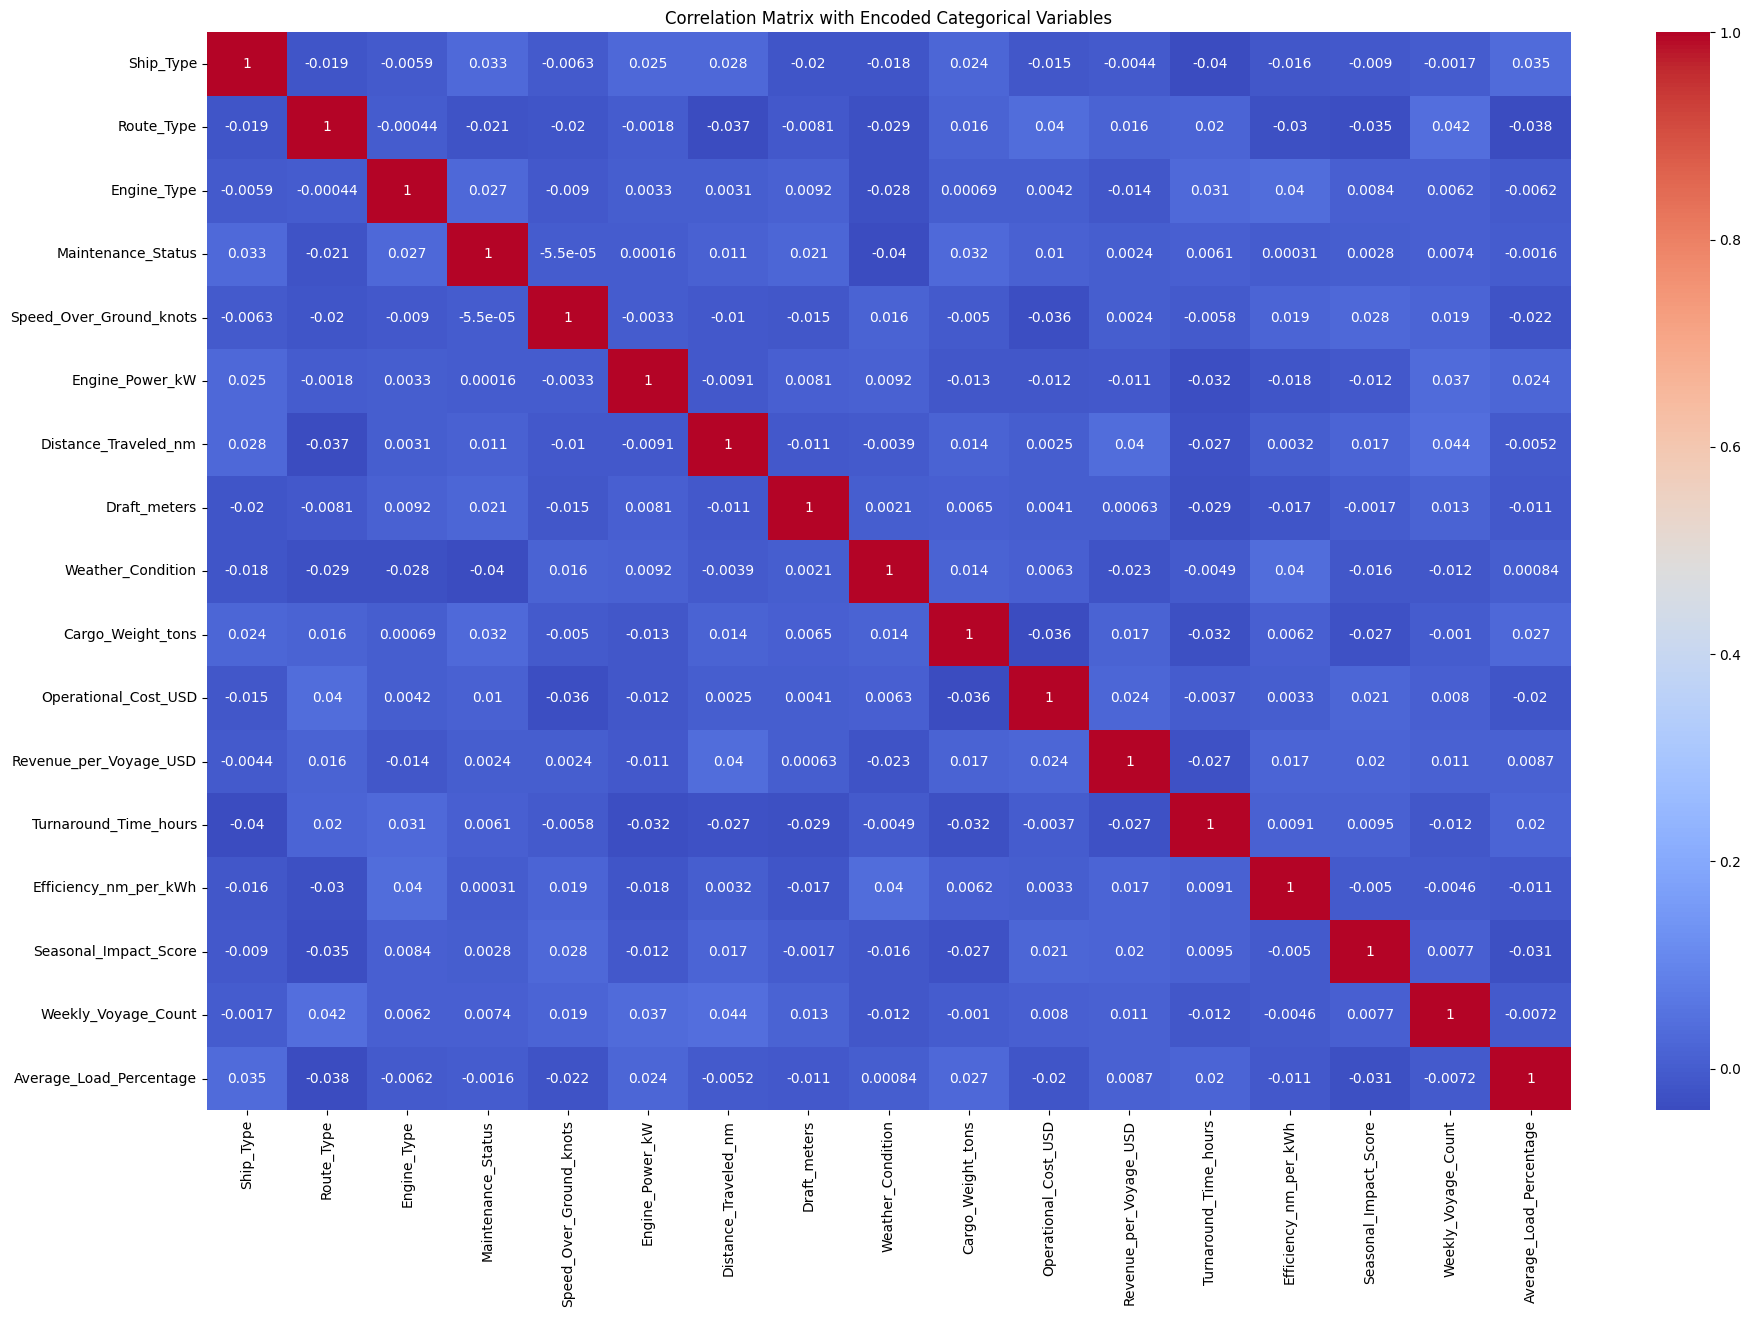

In [15]:
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
plt.figure(figsize=(22,14))

sns.heatmap(scaled_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix with Encoded Categorical Variables")

In [16]:
# Merge revenue and cost columns

data["Total_Profit"] = data["Revenue_per_Voyage_USD"] - data["Operational_Cost_USD"]
data.drop(columns=['Revenue_per_Voyage_USD', 'Operational_Cost_USD'], inplace=True) 

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Preprocess the data
numeric_data = data.select_dtypes(exclude='object')  # Select numeric columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Step 2: Apply PCA
pca = PCA(n_components=0.9)  # Retain 95% of the variance
principal_components = pca.fit_transform(scaled_data)

# Step 3: Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Number of components:", pca.n_components_)

# Step 4: Create a DataFrame with principal components
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

Explained variance ratio: [0.07121276 0.06872017 0.06805867 0.06721637 0.06538488 0.06498555
 0.06436481 0.06271361 0.0623088  0.0610909  0.05949697 0.05865624
 0.05792726 0.05746188 0.05565738]
Number of components: 15


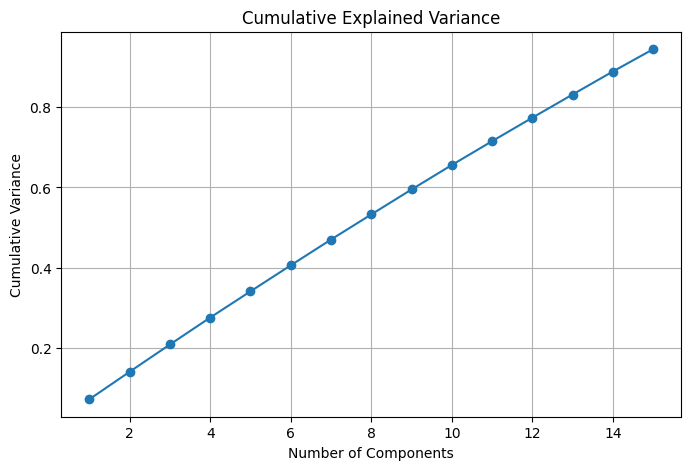

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.grid()
plt.show()

In [19]:
data.columns.tolist()

['Ship_Type',
 'Route_Type',
 'Engine_Type',
 'Maintenance_Status',
 'Speed_Over_Ground_knots',
 'Engine_Power_kW',
 'Distance_Traveled_nm',
 'Draft_meters',
 'Weather_Condition',
 'Cargo_Weight_tons',
 'Turnaround_Time_hours',
 'Efficiency_nm_per_kWh',
 'Seasonal_Impact_Score',
 'Weekly_Voyage_Count',
 'Average_Load_Percentage',
 'Total_Profit']

In [21]:
correlation = df['Speed_Over_Ground_knots'].corr(df['Engine_Power_kW'])
print(f"Correlation between Speed_Over_Ground_knots and Engine_Power_kW: {correlation}")

Correlation between Speed_Over_Ground_knots and Engine_Power_kW: -0.003299412716146519


In [26]:
data.Ship_Type.dtype

dtype('int64')

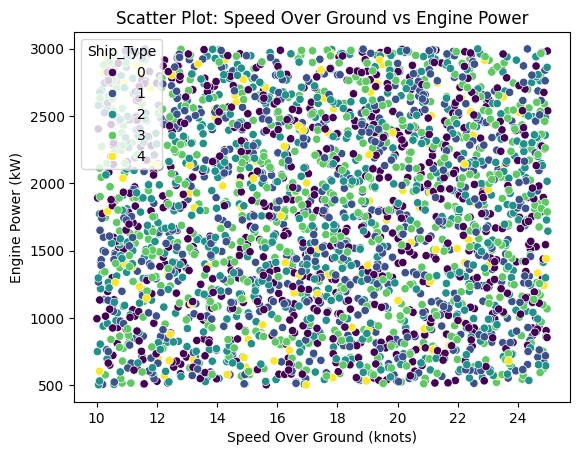

In [27]:
sns.scatterplot(x = data['Speed_Over_Ground_knots'], y= data['Engine_Power_kW'], hue=data['Ship_Type'],  palette='viridis' )
plt.title('Scatter Plot: Speed Over Ground vs Engine Power')
plt.xlabel('Speed Over Ground (knots)')
plt.ylabel('Engine Power (kW)')
plt.show()